<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/EDO_Aplicadas-IMCA/blob/main/RK_2_EDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Metodo RK-2 para EDO

Sea el problema de valor inicial(PVI):

$$   y=f(t,y) $$
con
$y(a)=\alpha$  y  $a<t<b$


Donde $f$ una funcion Lipschitziana en la variable $y$. El método consiste en lo siguiente iteracion:

$$w_{i+1}=w_{i}+h(AK_{1}+BK_{2})$$

Donde:
* $K_{1}=f(t_{i},u_{i})$
* $K_{2}=f(t_{i}+ \alpha h,u_{i}+\beta hK_{1})$
* $A+B=1, \alpha B=1/2, \beta B=1/2$


In [4]:
#RUNGE KUTTA ORDEN 2 - EDO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#definicion de la funcion f
def f(t,y):
  return y-t**2+1
#Metodo de RK
def RK2(a,b,y0,f,N,B):
  """
  Implementacion metodo de RK4
  a--Inicio Intervalo
  b--Fin de Intervalo
  y0--Aproximacion Inicial
  f-funcion
  N--Pasos
  B--Parametro del sistema de variable del RK-2
  Salida
  w--aproximacion final
  """
  A=1-B
  alfa=(1/2)/B
  beta=(1/2)/B

  h=(b-a)/N
  t=a
  w=y0
  Y,T=[],[]
  T+=[a]
  Y+=[w]
  for i in range(1,N+1):
    k1=f(t,w)
    k2=f(t+alfa*h,w+beta*h*k1)
    w=w+h*(A*k1+B*k2)
    Y+=[w]
    t=a+i*h
    T+=[t]
  return T,Y

In [5]:
# Definicion de la funcion solucion Y
def ff(T):
  y_real=[]
  for t in T:
    y_real+=[(t+1)**2-0.5*np.exp(t)]
  return y_real

      t       w_i       y_i        Er
0   0.0  0.500000  0.500000  0.000000
1   0.2  0.810000  0.829299  0.023271
2   0.4  1.171400  1.214088  0.035160
3   0.6  1.577908  1.648941  0.043078
4   0.8  2.021848  2.127230  0.049539
5   1.0  2.493854  2.640859  0.055666
6   1.2  2.982502  3.179942  0.062089
7   1.4  3.473853  3.732400  0.069271
8   1.6  3.950900  4.283484  0.077643
9   1.8  4.392898  4.815176  0.087697
10  2.0  4.774536  5.305472  0.100073


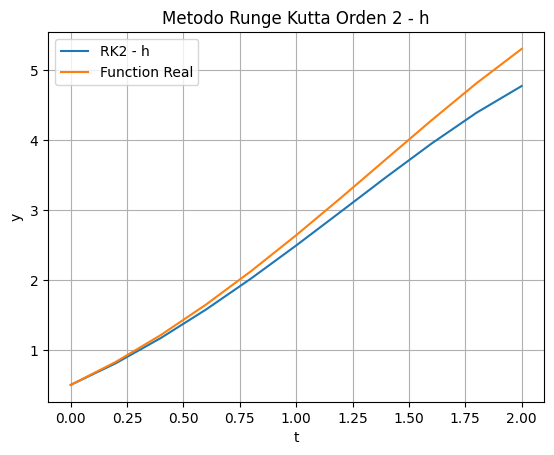

In [8]:
#RK-2 para h=0.5
tr,yr1=RK2(0,2,0.5,f,10,0.1)
yv=ff(tr)
datos={'t':tr,'w_i':yr1,'y_i':yv,'Er': [z / q for z,q in zip([x-y for x,y in zip(yv,yr1)],yv)]}
df1=pd.DataFrame(datos)
print(df1)

plt.plot(tr,yr1)
plt.plot(tr,yv)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Metodo Runge Kutta Orden 2 - h')
plt.legend(['RK2 - h','Function Real'])
plt.show()